In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import glob
import shutil
import os
import gc
print(os.listdir("../input/"))
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# Any results you write to the current directory are saved as output.

['train', 'test']


In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [16]:
torch.cuda.is_available()

True

In [17]:
torch.backends.cudnn.enabled

True

In [3]:
os.makedirs('../working/dogcats/cats/')
os.makedirs('../working/dogcats/dogs/')

In [4]:
src_dir = "../input/train/"
dst_dir_1 = "../working/dogcats/cats/"
dst_dir_2 = "../working/dogcats/dogs/"

In [5]:
PATH = "../working/dogscats/"
sz=224

In [6]:
for jpgfile in iglob(os.path.join(src_dir, "cat*.jpg")):
    shutil.copy(jpgfile, dst_dir_1)

for jpgfile in iglob(os.path.join(src_dir, "dog*.jpg")):
    shutil.copy(jpgfile, dst_dir_2)

In [9]:
gc.collect()

2792

**LOOK AT DOG PICTURES**

In [25]:
files = os.listdir('./dogcats/dogs/')[:5]
files

['dog.2797.jpg', 'dog.8625.jpg', 'dog.3617.jpg', 'dog.470.jpg', 'dog.7236.jpg']

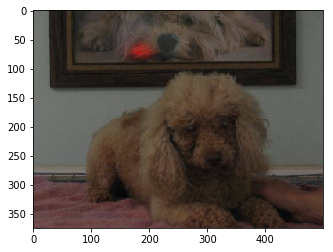

In [26]:
img = plt.imread(f'./dogcats/dogs/{files[0]}')
plt.imshow(img)

In [27]:
img.shape

(375, 499, 3)

In [29]:
img[:4,:4]

array([[[105, 110, 104],
        [105, 110, 104],
        [106, 111, 105],
        [106, 111, 105]],

       [[105, 110, 104],
        [105, 110, 104],
        [106, 111, 105],
        [106, 111, 105]],

       [[106, 111, 105],
        [106, 111, 105],
        [106, 111, 105],
        [107, 112, 106]],

       [[106, 111, 105],
        [106, 111, 105],
        [107, 112, 106],
        [107, 112, 106]]], dtype=uint8)

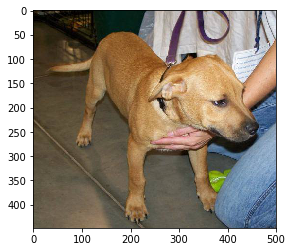

In [30]:
img = plt.imread(f'./dogcats/dogs/{files[1]}')
plt.imshow(img)

In [31]:
img.shape

(448, 500, 3)

In [32]:
img[:4,:4]

array([[[27, 28, 22],
        [38, 38, 30],
        [46, 43, 34],
        [51, 48, 33]],

       [[24, 25, 19],
        [33, 32, 27],
        [39, 36, 27],
        [38, 34, 22]],

       [[32, 31, 26],
        [42, 39, 34],
        [44, 40, 31],
        [38, 32, 20]],

       [[32, 29, 24],
        [41, 36, 32],
        [46, 42, 33],
        [46, 40, 28]]], dtype=uint8)